In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

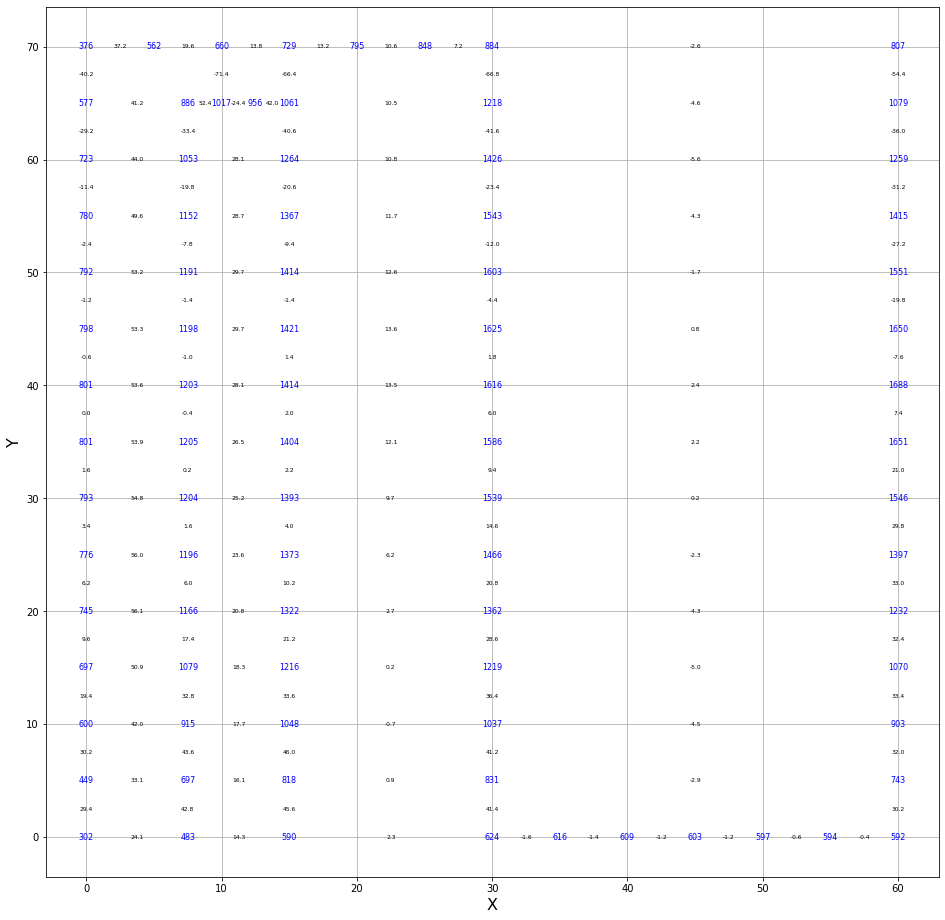

In [4]:
x = []
y = []
z = []

with open("test_1124.csv") as f:
    reader = csv.reader(f)
    for row in [row for row in reader]:
        x.append(row[0])
        y.append(float(row[1]))
        z.append(row[2])
x = [float(r) for r in x[1:]]
x.insert(0, 0.0)

up_nd = 0
fig_not_dot = []

for xC in x:

    udxC = str(xC).split(".")[1]
    fig_not_dot.append(udxC)
    
nozero = sum(map(lambda i: int(i) > 0, fig_not_dot))

if nozero > 1:
    up_nd = max([len(lang) for lang in fig_not_dot])


fig_not_dot = []
for yC in y:

    udyC = str(yC).split(".")[1]
    fig_not_dot.append(udyC)
    
nozero = sum(map(lambda i: int(i) > 0, fig_not_dot))

if nozero > 1:
    if max([len(lang) for lang in fig_not_dot]) > up_nd:
        up_nd = max([len(lang) for lang in fig_not_dot])


x_upnd = [int(r * (10**up_nd)) for r in x]
y_upnd = [int(r * (10**up_nd)) for r in y]




width = max(x_upnd)
height = max(y_upnd)
img = np.zeros([height + 1, width + 1])


pdx, pdxx, pdxy = [], [], []
pdy, pdyx, pdyy = [], [], []

for i in range(len(z)):
    img[y_upnd[i]][x_upnd[i]] = z[i]

    
for h in range(height + 1):
    
    ret_x = 0
    for w in range(width):
        if img[h][w] > 0:
            ret_x = img[h][w]
            dis = 1
        else:
            dis += 1
            
        if ret_x > 0 and img[h][w + 1] > 0:
            this_grad_x = (img[h][w + 1] - ret_x) / (dis / (10**up_nd))
            pdx.append(this_grad_x)
            pdxx.append((w + 1 - dis / 2) / (10**up_nd))
            pdxy.append(h / (10**up_nd))



for w in range(width + 1):
    
    ret_y = 0
    for h in range(height):
        if img[h][w] > 0:
            ret_y = img[h][w]
            dis = 1
        else:
            dis += 1
            
        if ret_y > 0 and img[h + 1][w] > 0:
            this_grad_y = (img[h + 1][w] - ret_y) / (dis / (10**up_nd))
            pdy.append(this_grad_y)
            pdyx.append(w / (10**up_nd))
            pdyy.append((h + 1 - dis / 2) / (10**up_nd))




x_dwnd = [x_ / (10**up_nd) for x_ in x_upnd]
y_dwnd = [y_ / (10**up_nd) for y_ in y_upnd]


plt.figure(figsize=(16, 16))
plt.xlabel("X", fontsize=16)
plt.ylabel("Y", fontsize=16)
plt.grid()
plt.plot(x_dwnd, y_dwnd, linestyle='')
plt.plot(pdxx, pdxy, linestyle='', color='green')
plt.plot(pdyx, pdyy, linestyle='', color='green')


for i in range(len(z)):
    plt.text(x_dwnd[i], y_dwnd[i], str(z[i]), fontsize=8, color="blue", horizontalalignment='center', verticalalignment='center')


for i in range(len(pdx)):
    plt.text(pdxx[i], pdxy[i], round(pdx[i], 1), fontsize=6, horizontalalignment='center', verticalalignment='center')

for i in range(len(pdy)):
    plt.text(pdyx[i], pdyy[i], round(pdy[i], 1), fontsize=6, horizontalalignment='center', verticalalignment='center')